In [1]:
from matplotlib import pyplot
from keras.datasets import cifar10
# load dataset


In [2]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [3]:
print(x_train.shape)

(50000, 32, 32, 3)


In [4]:
print(x_test.shape) # 50000 images with size 32*32 pixels and 3 channels and images are square
print(y_train.shape)
print(y_test.shape)

(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


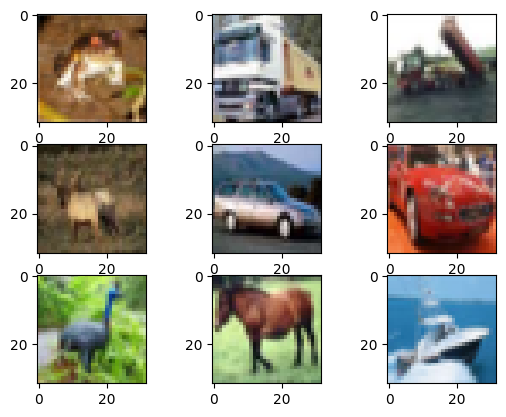

In [5]:
for i in range(9):
 # define subplot
 pyplot.subplot(330 + 1 + i)
 # plot raw pixel data
 pyplot.imshow(x_train[i])
# show the figure
pyplot.show()

In [6]:
# images are smaller than usual photographic image and are of low resolution

In [7]:
# It is an image classification problem using convolutional neural network

In [8]:
import tensorflow as tf

In [9]:
y_train=y_train.flatten()
y_test=y_test.flatten()

In [10]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [11]:
import numpy as np
import tensorflow as tf

In [12]:
input_shape=(32,32,3)
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],3)
x_train=x_train/255
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],3)
x_test=x_test/255



In [13]:
y_train=tf.one_hot(y_train.astype(np.int32),depth=10)
y_test=tf.one_hot(y_test.astype(np.int32),depth=10)

In [14]:
y_train[0]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)>

tf.Tensor([0. 0. 0. 0. 0. 0. 0. 0. 1. 0.], shape=(10,), dtype=float32)


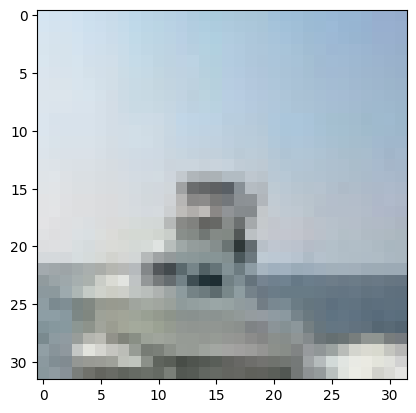

In [15]:
pyplot.imshow(x_train[100])
print(y_train[100])

In [16]:
import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD

In [17]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal',input_shape=(32,32,3)))
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=512,activation='relu',kernel_initializer='glorot_normal'))
model.add(Dense(units=128,activation='relu',kernel_initializer='glorot_normal'))
model.add(Dense(units=10,activation='softmax'))
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x=x_train,y=y_train,batch_size=32,epochs=20,validation_data=(x_test,y_test))

Epoch 1/20
1563/1563 [==============================] - 24s 7ms/step - loss: 1.3312 - accuracy: 0.5197 - val_loss: 1.0845 - val_accuracy: 0.6181
Epoch 2/20
1563/1563 [==============================] - 10s 7ms/step - loss: 0.8958 - accuracy: 0.6830 - val_loss: 0.9310 - val_accuracy: 0.6772
Epoch 3/20
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6610 - accuracy: 0.7689 - val_loss: 0.8999 - val_accuracy: 0.6947
Epoch 4/20
1563/1563 [==============================] - 10s 7ms/step - loss: 0.4513 - accuracy: 0.8415 - val_loss: 1.0214 - val_accuracy: 0.6890
Epoch 5/20
1563/1563 [==============================] - 10s 7ms/step - loss: 0.2662 - accuracy: 0.9078 - val_loss: 1.1664 - val_accuracy: 0.6884
Epoch 6/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1722 - accuracy: 0.9416 - val_loss: 1.4716 - val_accuracy: 0.6856
Epoch 7/20
1563/1563 [==============================] - 12s 8ms/step - loss: 0.1213 - accuracy: 0.9590 - val_loss: 1.5977 - val_ac

In [18]:
# glorot_normal used for initializing the weight in deep neural network when there are multiple layers

In [19]:
# # history['loss'] typically refers to a record or array that stores the values of the loss function at each epoch during the training process.
# A decreasing loss generally indicates that the model is improving and getting closer to the desired output. On the other hand, if the loss function remains high or fluctuates wildly, it may indicate that the model is struggling to learn the patterns in the data or is overfitting.

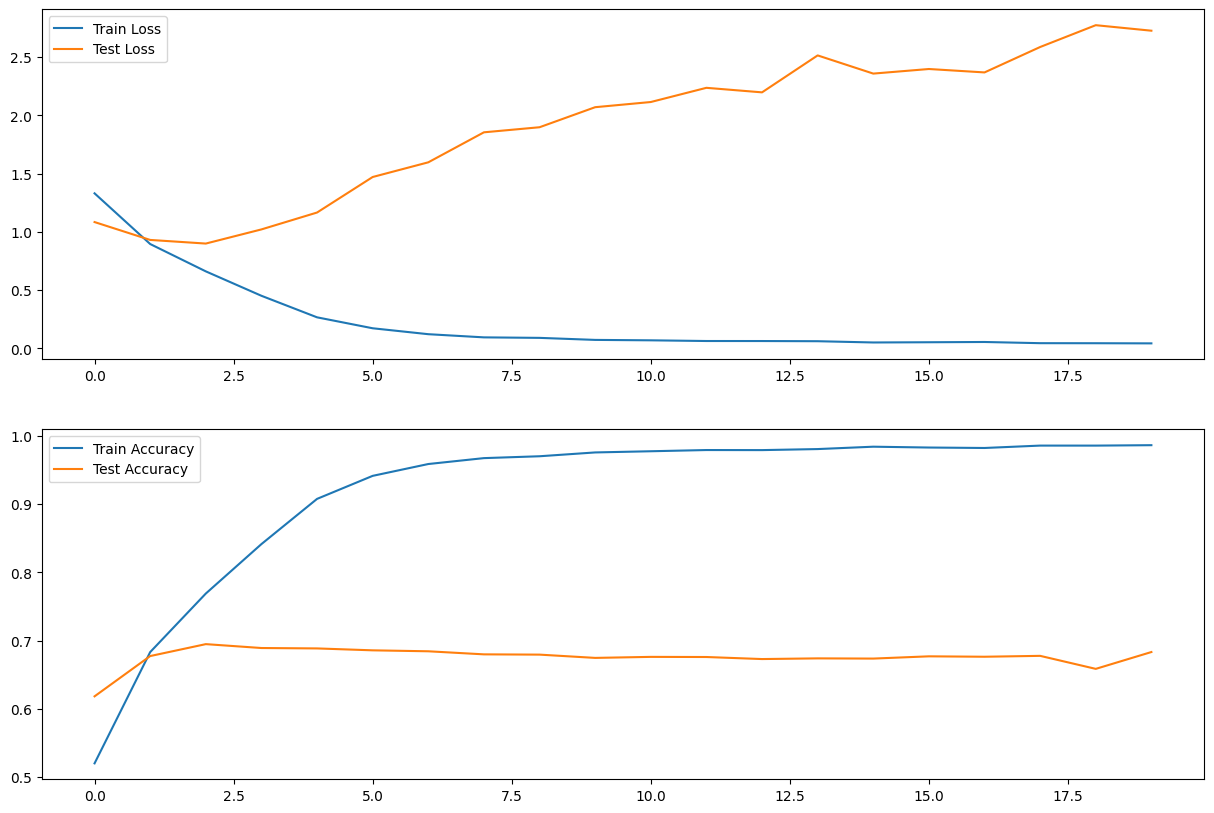

In [20]:
fig,ax=pyplot.subplots(2,figsize=(15,10))
ax[0].plot(history.history['loss'],label='Train Loss')
ax[0].plot(history.history['val_loss'],label='Test Loss')
ax[0].legend()
ax[1].plot(history.history['accuracy'],label='Train Accuracy')
ax[1].plot(history.history['val_accuracy'],label='Test Accuracy')
ax[1].legend()

In [21]:
# evaluating the model on test_data

In [22]:
evaluation=model.evaluate(x=x_test,y=y_test,batch_size=32)

313/313 [==============================] - 1s 3ms/step - loss: 2.7283 - accuracy: 0.6831


In [23]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal',input_shape=(32,32,3)))
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=512,activation='relu',kernel_initializer='glorot_normal'))
model.add(Dense(units=128,activation='relu',kernel_initializer='glorot_normal'))
model.add(Dense(units=10,activation='softmax'))
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x=x_train,y=y_train,batch_size=32,epochs=20,validation_data=(x_test,y_test))

Epoch 1/20
1563/1563 [==============================] - 15s 7ms/step - loss: 1.3468 - accuracy: 0.5136 - val_loss: 1.0074 - val_accuracy: 0.6344
Epoch 2/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8802 - accuracy: 0.6903 - val_loss: 0.8328 - val_accuracy: 0.7101
Epoch 3/20
1563/1563 [==============================] - 12s 8ms/step - loss: 0.6849 - accuracy: 0.7590 - val_loss: 0.8422 - val_accuracy: 0.7104
Epoch 4/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.5324 - accuracy: 0.8126 - val_loss: 0.7654 - val_accuracy: 0.7431
Epoch 5/20
1563/1563 [==============================] - 11s 7ms/step - loss: 0.3997 - accuracy: 0.8587 - val_loss: 0.8298 - val_accuracy: 0.7440
Epoch 6/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.2900 - accuracy: 0.8996 - val_loss: 0.9236 - val_accuracy: 0.7460
Epoch 7/20
1563/1563 [==============================] - 12s 8ms/step - loss: 0.2142 - accuracy: 0.9251 - val_loss: 1.1032 - val_ac

In [24]:
# plotting the performance metrics

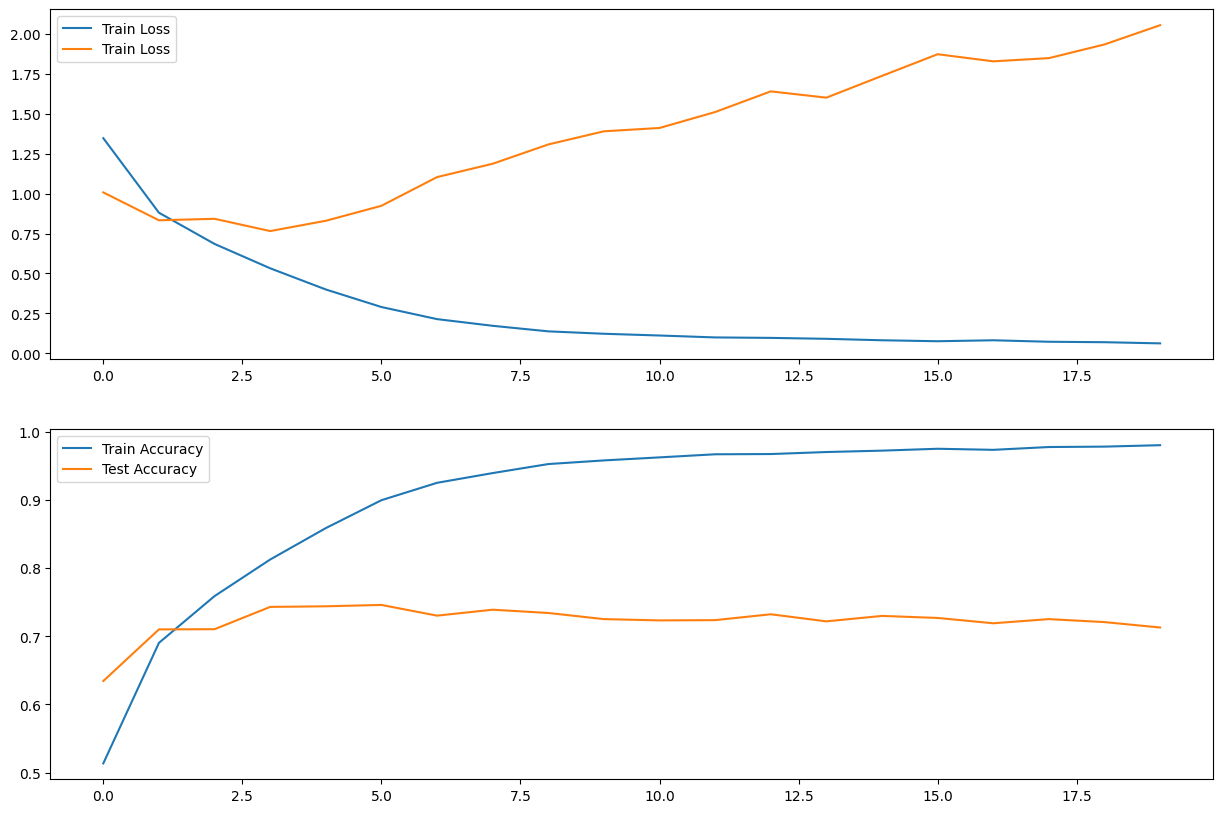

In [25]:
fig,ax=pyplot.subplots(2,figsize=(15,10))
ax[0].plot(history.history['loss'],label='Train Loss')
ax[0].plot(history.history['val_loss'],label='Train Loss')
ax[0].legend()
ax[1].plot(history.history['accuracy'],label='Train Accuracy')
ax[1].plot(history.history['val_accuracy'],label='Test Accuracy')
ax[1].legend()

In [26]:
evaluation=model.evaluate(x=x_test,y=y_test,batch_size=32)


313/313 [==============================] - 1s 4ms/step - loss: 2.0541 - accuracy: 0.7129


In [27]:
# trying 3 VGG block

In [28]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer='glorot_normal',input_shape=(32,32,3)))
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer='glorot_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer='glorot_normal'))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer='glorot_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer='glorot_normal'))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding='same',activation='relu',kernel_initializer='glorot_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=512,activation='relu',kernel_initializer='glorot_normal'))
model.add(Dense(units=128,activation='relu',kernel_initializer='glorot_normal'))
model.add(Dense(units=10,activation='softmax'))
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(x=x_train,y=y_train,batch_size=32,epochs=20,validation_data=(x_test,y_test))

Epoch 1/20
1563/1563 [==============================] - 18s 9ms/step - loss: 1.4864 - accuracy: 0.4493 - val_loss: 1.2750 - val_accuracy: 0.5555
Epoch 2/20
1563/1563 [==============================] - 14s 9ms/step - loss: 0.9850 - accuracy: 0.6493 - val_loss: 0.9395 - val_accuracy: 0.6769
Epoch 3/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.7843 - accuracy: 0.7215 - val_loss: 0.7681 - val_accuracy: 0.7323
Epoch 4/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.6419 - accuracy: 0.7763 - val_loss: 0.7872 - val_accuracy: 0.7316
Epoch 5/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.5332 - accuracy: 0.8123 - val_loss: 0.7819 - val_accuracy: 0.7439
Epoch 6/20
1563/1563 [==============================] - 12s 8ms/step - loss: 0.4438 - accuracy: 0.8447 - val_loss: 0.7553 - val_accuracy: 0.7599
Epoch 7/20
1563/1563 [==============================] - 13s 8ms/step - loss: 0.3691 - accuracy: 0.8697 - val_loss: 0.8301 - val_ac

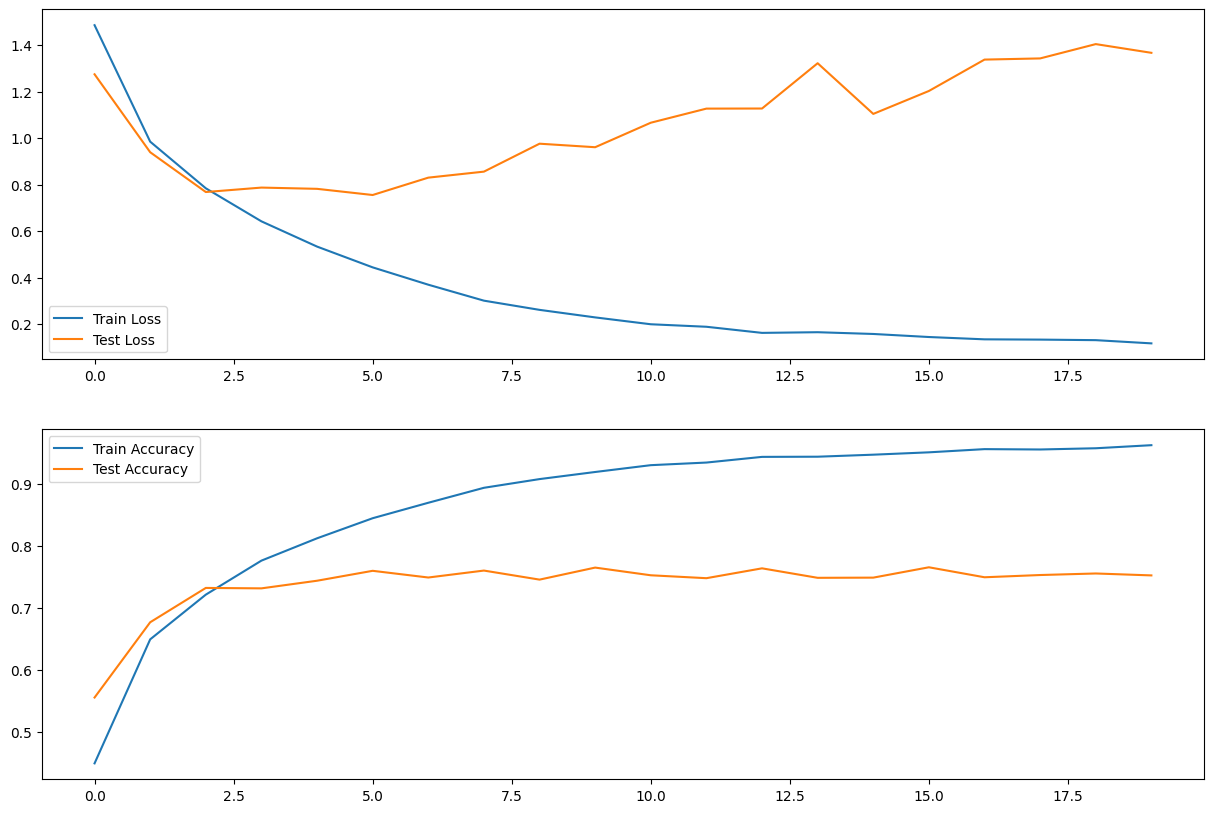

In [30]:
fig,ax=pyplot.subplots(2,figsize=(15,10))
ax[0].plot(history.history['loss'],label='Train Loss')
ax[0].plot(history.history['val_loss'],label='Test Loss')
ax[0].legend()
ax[1].plot(history.history['accuracy'],label='Train Accuracy')
ax[1].plot(history.history['val_accuracy'],label='Test Accuracy')
ax[1].legend()

In [31]:
# Using dropout layer with dropout 0.2 and trained on train data


In [33]:
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,Dropout,BatchNormalization

In [34]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal',input_shape=(32,32,3)))
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add((Dropout(0.2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add((Dropout(0.2)))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add((Dropout(0.2)))
model.add(Flatten())
model.add(Dense(units=512,activation='relu',kernel_initializer='glorot_normal'))
model.add((Dropout(0.2)))
model.add(Dense(units=128,activation='relu',kernel_initializer='glorot_normal'))
model.add((Dropout(0.2)))
model.add(Dense(units=10,activation='softmax'))
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x=x_train,y=y_train,batch_size=32,epochs=50,validation_data=(x_test,y_test))

Epoch 1/50
1563/1563 [==============================] - 20s 11ms/step - loss: 1.6183 - accuracy: 0.4011 - val_loss: 1.2608 - val_accuracy: 0.5409
Epoch 2/50
1563/1563 [==============================] - 15s 10ms/step - loss: 1.1703 - accuracy: 0.5814 - val_loss: 0.9793 - val_accuracy: 0.6534
Epoch 3/50
1563/1563 [==============================] - 14s 9ms/step - loss: 1.0058 - accuracy: 0.6453 - val_loss: 0.9684 - val_accuracy: 0.6531
Epoch 4/50
1563/1563 [==============================] - 14s 9ms/step - loss: 0.9072 - accuracy: 0.6815 - val_loss: 0.8172 - val_accuracy: 0.7124
Epoch 5/50
1563/1563 [==============================] - 14s 9ms/step - loss: 0.8347 - accuracy: 0.7098 - val_loss: 0.8057 - val_accuracy: 0.7211
Epoch 6/50
1563/1563 [==============================] - 15s 9ms/step - loss: 0.7806 - accuracy: 0.7271 - val_loss: 0.7977 - val_accuracy: 0.7297
Epoch 7/50
1563/1563 [==============================] - 16s 10ms/step - loss: 0.7403 - accuracy: 0.7432 - val_loss: 0.7297 - val

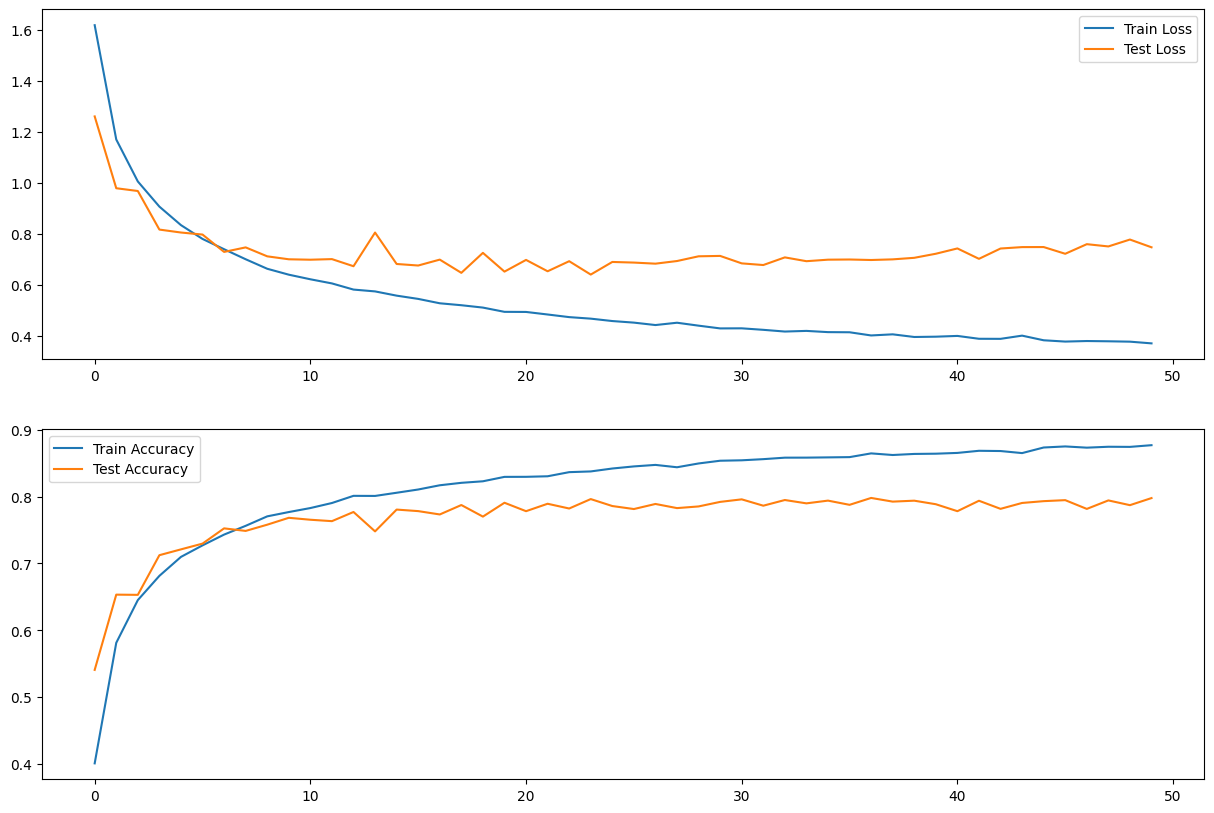

In [37]:
fig,ax=pyplot.subplots(2,figsize=(15,10))
ax[0].plot(history.history['loss'],label='Train Loss')
ax[0].plot(history.history['val_loss'],label='Test Loss')
ax[0].legend()
ax[1].plot(history.history['accuracy'],label='Train Accuracy')
ax[1].plot(history.history['val_accuracy'],label='Test Accuracy')
ax[1].legend()

In [38]:
#   Adding Batch Normalization Layer and trained on train dataset

In [39]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal',input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add((Dropout(0.3)))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add((Dropout(0.3)))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add((Dropout(0.3)))
model.add(Flatten())
model.add(Dense(units=128,activation='relu',kernel_initializer='glorot_normal'))
model.add((Dropout(0.3)))
model.add(Dense(units=10,activation='softmax'))
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x=x_train,y=y_train,batch_size=32,epochs=50,validation_data=(x_test,y_test))


Epoch 1/50
1563/1563 [==============================] - 24s 12ms/step - loss: 1.6029 - accuracy: 0.4224 - val_loss: 1.2853 - val_accuracy: 0.5647
Epoch 2/50
1563/1563 [==============================] - 20s 13ms/step - loss: 1.1529 - accuracy: 0.5949 - val_loss: 1.1247 - val_accuracy: 0.6212
Epoch 3/50
1563/1563 [==============================] - 18s 11ms/step - loss: 0.9629 - accuracy: 0.6674 - val_loss: 0.8628 - val_accuracy: 0.7010
Epoch 4/50
1563/1563 [==============================] - 19s 12ms/step - loss: 0.8499 - accuracy: 0.7076 - val_loss: 0.7422 - val_accuracy: 0.7381
Epoch 5/50
1563/1563 [==============================] - 18s 11ms/step - loss: 0.7752 - accuracy: 0.7352 - val_loss: 0.6585 - val_accuracy: 0.7754
Epoch 6/50
1563/1563 [==============================] - 18s 12ms/step - loss: 0.7245 - accuracy: 0.7545 - val_loss: 0.6731 - val_accuracy: 0.7723
Epoch 7/50
1563/1563 [==============================] - 19s 12ms/step - loss: 0.6695 - accuracy: 0.7743 - val_loss: 0.6024 -

In [40]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [41]:
datagen=ImageDataGenerator(height_shift_range=0.2,horizontal_flip=0.2)
it_train=datagen.flow(x_train,y_train,batch_size=32)
history=model.fit(it_train,epochs=50,validation_data=(x_test,y_test))



Epoch 1/50
1563/1563 [==============================] - 45s 28ms/step - loss: 0.5878 - accuracy: 0.8052 - val_loss: 0.6018 - val_accuracy: 0.8147
Epoch 2/50
1563/1563 [==============================] - 44s 28ms/step - loss: 0.5349 - accuracy: 0.8233 - val_loss: 0.5219 - val_accuracy: 0.8367
Epoch 3/50
1563/1563 [==============================] - 43s 28ms/step - loss: 0.5149 - accuracy: 0.8266 - val_loss: 0.4786 - val_accuracy: 0.8509
Epoch 4/50
1563/1563 [==============================] - 43s 27ms/step - loss: 0.4996 - accuracy: 0.8318 - val_loss: 0.4320 - val_accuracy: 0.8621
Epoch 5/50
1563/1563 [==============================] - 44s 28ms/step - loss: 0.4872 - accuracy: 0.8354 - val_loss: 0.4711 - val_accuracy: 0.8556
Epoch 6/50
1563/1563 [==============================] - 44s 28ms/step - loss: 0.4799 - accuracy: 0.8370 - val_loss: 0.4075 - val_accuracy: 0.8659
Epoch 7/50
1563/1563 [==============================] - 44s 28ms/step - loss: 0.4780 - accuracy: 0.8387 - val_loss: 0.4140 -

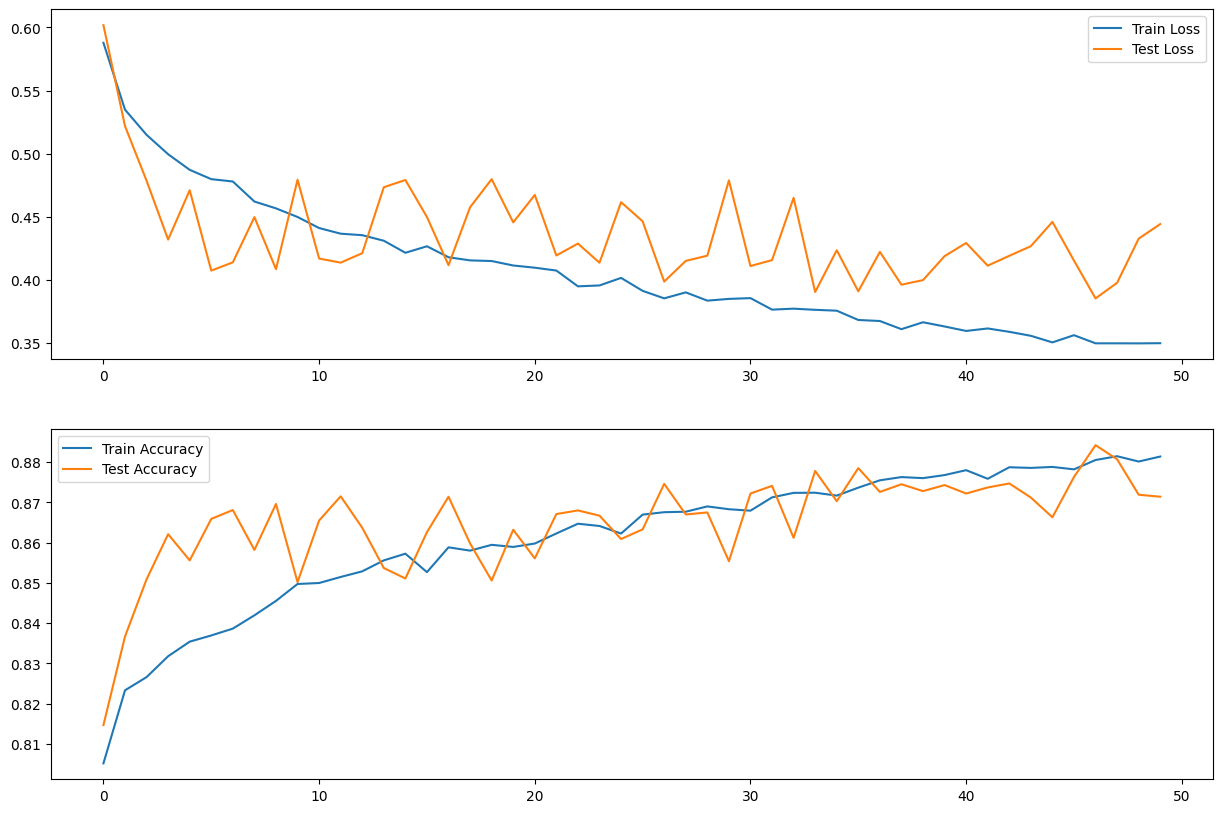

In [42]:
fig,ax=pyplot.subplots(2,figsize=(15,10))
ax[0].plot(history.history['loss'],label='Train Loss')
ax[0].plot(history.history['val_loss'],label='Test Loss')
ax[0].legend()
ax[1].plot(history.history['accuracy'],label='Train Accuracy')
ax[1].plot(history.history['val_accuracy'],label='Test Accuracy')
ax[1].legend()